In [ ]:
!pip install tensorflow

In [1]:
from mtcnn import MTCNN
import cv2
img = cv2.cvtColor(cv2.imread("ivan.jpg"), cv2.COLOR_BGR2RGB)
detector = MTCNN()
faces = detector.detect_faces(img)

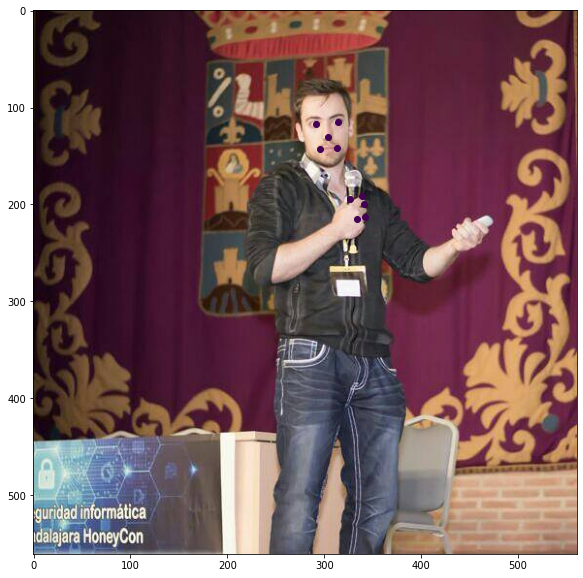

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(img)
for face in faces:
    for keys_v in face["keypoints"].values():
        plt.scatter(*keys_v, c=0)

### align IJB-C

In [6]:
import glob
from pathlib import PosixPath

In [13]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../../")
import numpy as np
from face_lib.utils import get_similarity_transform_for_cv2, align_image

In [144]:
ls = glob.glob("../data/ijba_cropped/*/*.png")

In [145]:
ls.extend(glob.glob("../data/ijba_cropped/*/*.jpg"))

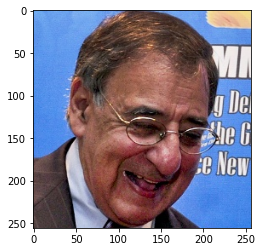

In [146]:
img = cv2.cvtColor(cv2.imread(ls[np.random.choice(len(ls), 1)[0]]), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [147]:
faces = detector.detect_faces(img)

In [148]:
keyps = faces[0]["keypoints"]

In [149]:
keyps

{'left_eye': (132, 132),
 'right_eye': (185, 146),
 'nose': (160, 180),
 'mouth_left': (108, 189),
 'mouth_right': (160, 202)}

In [150]:
def transform_key_dict_to_list(keyps: dict):
    res_ls = []
    key_order = ["left_eye", "right_eye", "nose", "mouth_left", "mouth_right"]
    for key_name in key_order:
        res_ls.extend(list(keyps[key_name]))
    res_ls = [float(_) for _ in res_ls]
    return res_ls

In [151]:
keyps_list = transform_key_dict_to_list(keyps)

In [152]:
keyps_list_np = np.array(keyps_list).reshape((5, 2)).T

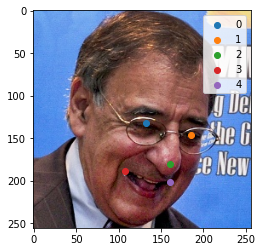

In [153]:
fig, ax = plt.subplots()
ax.imshow(img)
for i in range(5):
    ax.scatter(keyps_list_np[0][i], keyps_list_np[1][i], label=f"{i}")
ax.legend()

In [154]:
img_aligned = align_image(img, keyps_list_np, [112, 112], scale=1.0, transpose_input=True)

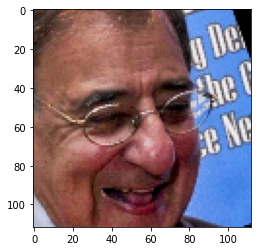

In [155]:
plt.imshow(img_aligned)

## LFW example

Aaron_Eckhart/Aaron_Eckhart_0001.jpg 106.130150 147.149750 124.940125 105.313637   139.664032 108.973488 113.321060 143.404816 159.001511 162.631866

In [62]:
keys_str = "106.130150 147.149750 124.940125 105.313637 139.664032 108.973488 113.321060 143.404816 159.001511 162.631866"
keys_list = [float(_) for _ in keys_str.split(" ")]

In [63]:
keys_list_np = np.array(keys_list).reshape((2, 5))

In [64]:
keys_list_np

array([[106.13015 , 147.14975 , 124.940125, 105.313637, 139.664032],
       [108.973488, 113.32106 , 143.404816, 159.001511, 162.631866]])

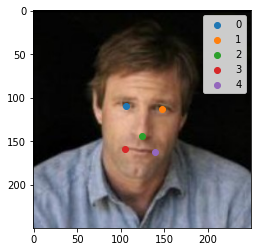

In [115]:
fig, ax = plt.subplots()
img_temp = cv2.cvtColor(cv2.imread("../../Aaron_Eckhart_0001.jpg"), cv2.COLOR_BGR2RGB)
ax.imshow(img_temp)
for i in range(5):
    ax.scatter(keys_list_np[0][i], keys_list_np[1][i], label=f"{i}")
ax.legend()

In [73]:
img_temp_aligned = align_image(img_temp, keys_list_np, [96, 112], scale=1.0, transpose_input=True)

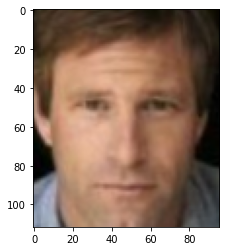

In [74]:
plt.imshow(img_temp_aligned)